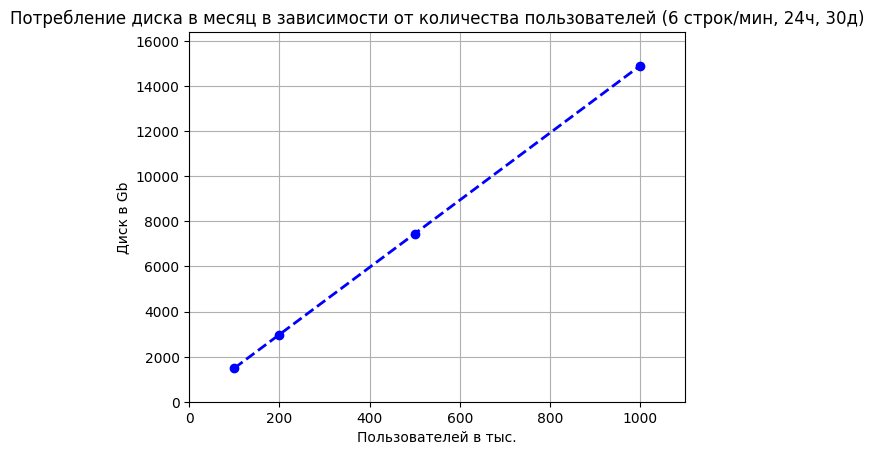

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv


def data(x, y):
    return np.array(x), np.array(y)

def draw_graph(x, y, xlabel, ylabel, title, color='green'):
    fig, ax = plt.subplots()
    ax.plot(x, y, 
            color=color, 
            marker='o', 
            linestyle='dashed', 
            linewidth=2, 
            markersize=6)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_title(title)
    plt.grid(True)

    offset_x = x[1] - x[0]
    offset_y = y[1] - y[0]
    plt.axis([x[0] - offset_x, x[-1] + offset_x,
              y[0] - offset_y, y[-1] + offset_y])
    plt.show()


def users_disk():
    users = [100, 200, 500, 1000]
    disk = [1490.4, 2980.8, 7452, 14904]
    users, disk = data(users, disk)
    draw_graph(users, disk,
               'Пользователей в тыс.', 
               'Диск в Gb', 
               'Потребление диска в месяц в зависимости от количества пользователей (6 строк/мин, 24ч, 30д)',
               'blue')

users_disk()


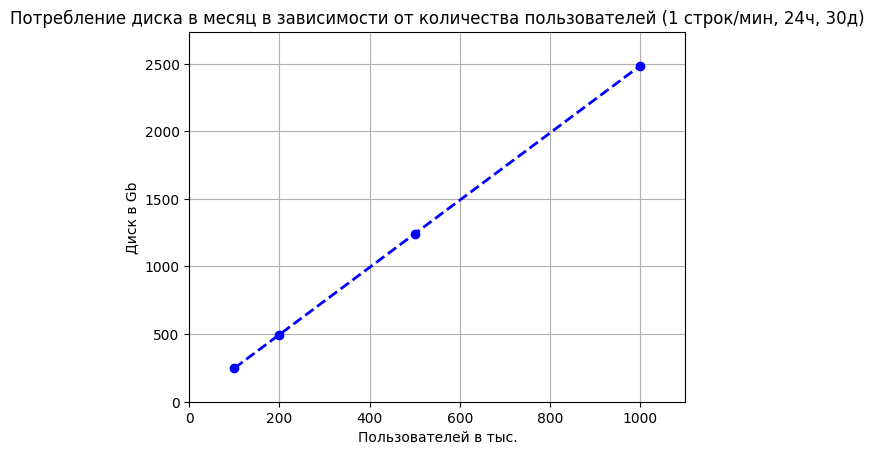

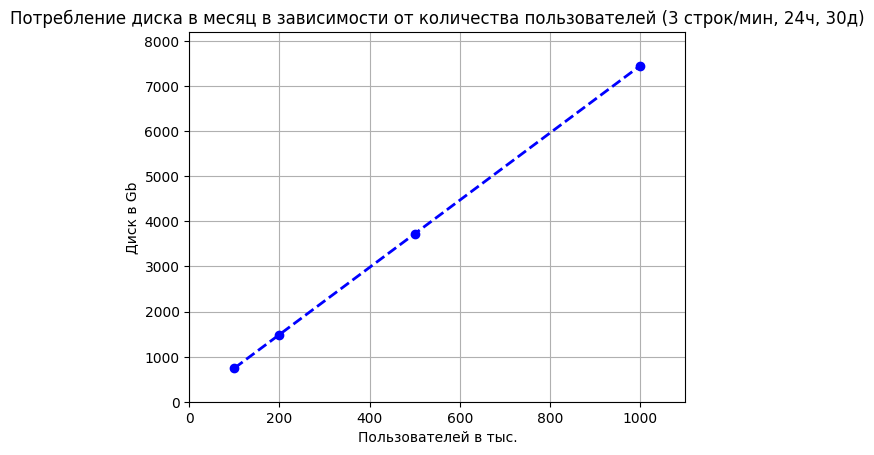

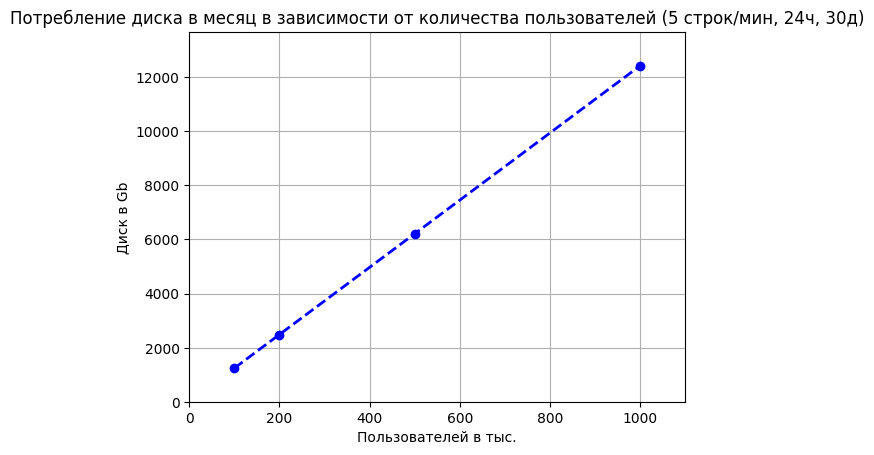

In [66]:
def users_disk(rows_per_minute=6, labor_per_day=24, labor_per_mounth=30):
    # Гигов в час потребляют 100к пользователей отправляя по 6 строчек в минуту
    # Получено эксперементально
    G_per_h_100k_6_r = 2.07
    G_per_h_1k_1_r = G_per_h_100k_6_r / (100 * 6) 
    users = [100, 200, 500, 1000]
    disk = [G_per_h_1k_1_r * rows_per_minute * labor_per_day * labor_per_mounth * x for x in users]
    
    users, disk = data(users, disk)
    draw_graph(users, disk,
               'Пользователей в тыс.', 
               'Диск в Gb', 
               f'Потребление диска в месяц в зависимости от количества пользователей ({rows_per_minute} строк/мин, {labor_per_day}ч, {labor_per_mounth}д)',
               'blue')
for i in range(1, 7, 2):
        users_disk(i)

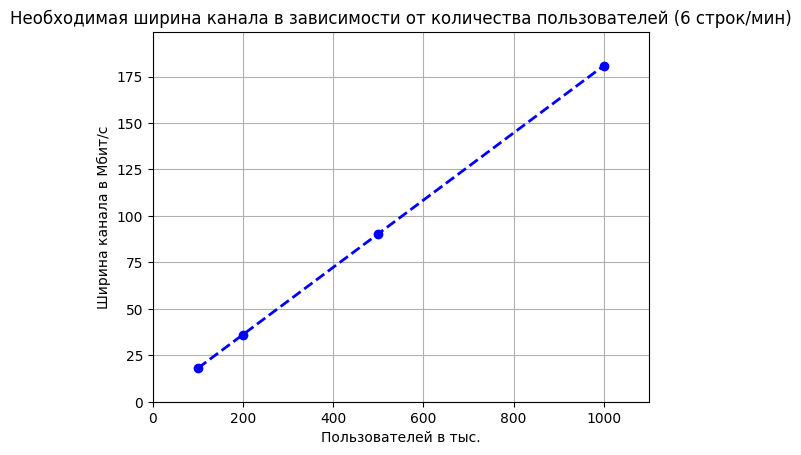

In [45]:
def rps(users, rows_per_minute):
    return users * rows_per_minute / 60

def Kbyte_to_Mbit(bytes):
    return (bytes / (10 ** 3)) * 8

def users_chanel(rows_per_minute=6):
    users = [100, 200, 500, 1000]
    chanel = [Kbyte_to_Mbit(rps(x, rows_per_minute) * 226) for x in users]
    users, chanel = data(users, chanel)
    draw_graph(users, chanel,
               'Пользователей в тыс.', 
               'Ширина канала в Мбит/c', 
               f'Необходимая ширина канала в зависимости от количества пользователей ({rows_per_minute} строк/мин)',
               'blue')

users_chanel()

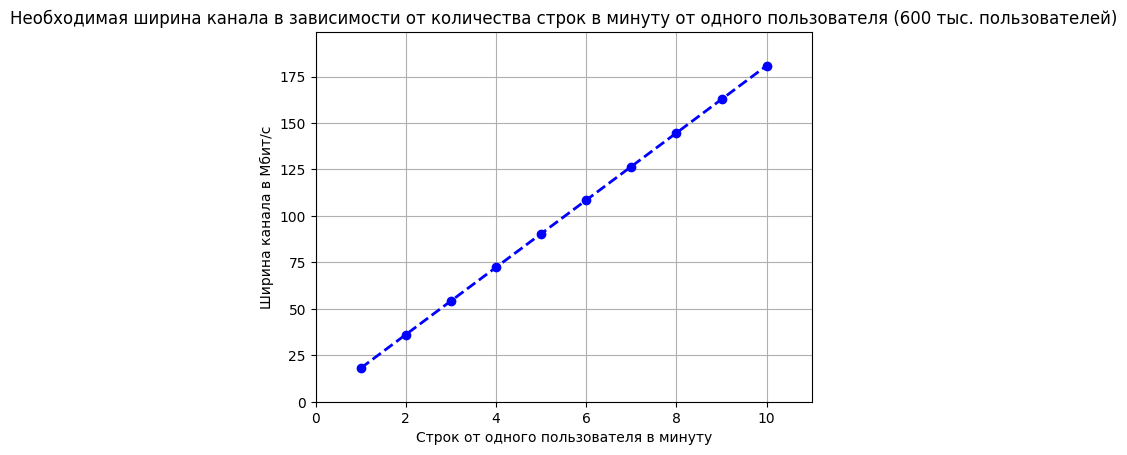

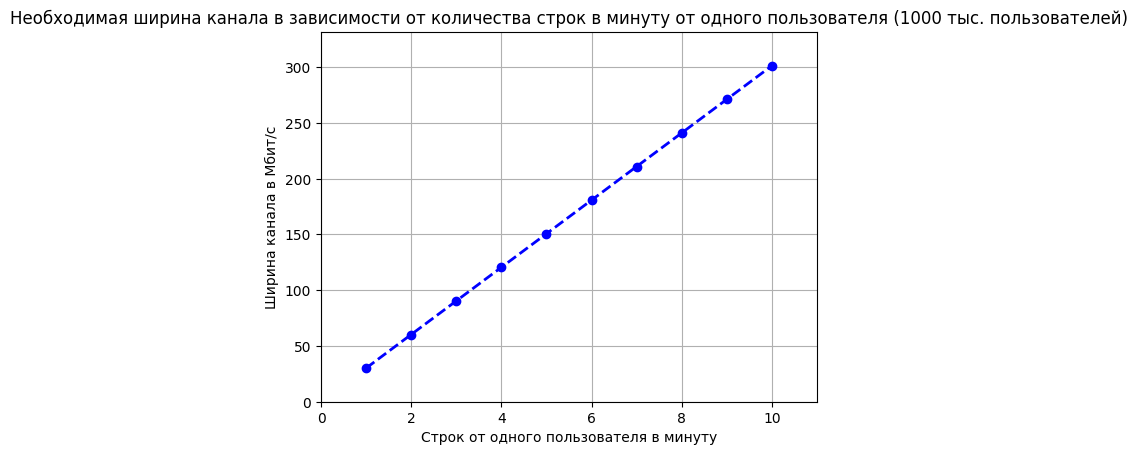

In [65]:
def rows_chanel(users = 100):
    rows_per_minute = [i for i in range(1, 11)]
    chanel = [Kbyte_to_Mbit(rps(users, x) * 226) for x in rows_per_minute]
    rows_per_minute, chanel = data(rows_per_minute, chanel)
    draw_graph(rows_per_minute, chanel,
               'Строк от одного пользователя в минуту', 
               'Ширина канала в Мбит/c', 
               f'Необходимая ширина канала в зависимости от количества строк в минуту от одного пользователя ({users} тыс. пользователей)',
               'blue')

users = [600, 1000]  
for i in users:
    rows_chanel(i)

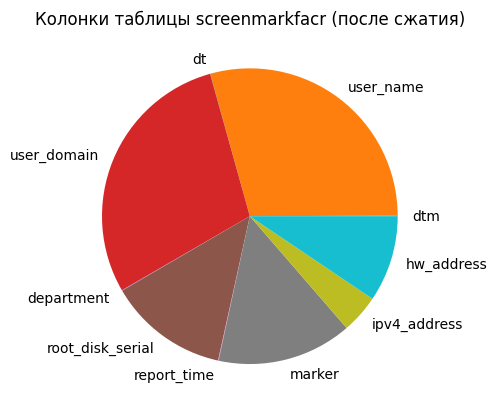

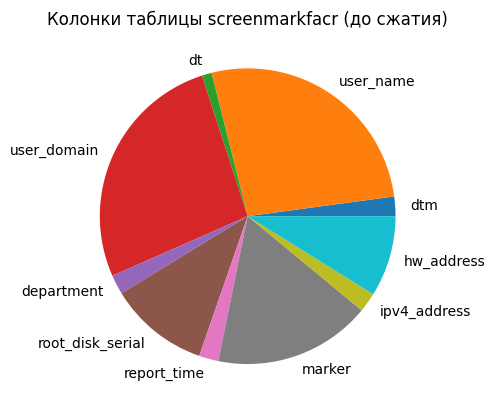

In [64]:
import matplotlib.pyplot as plt
def circle(labels, columns, title):
    fig, ax = plt.subplots()
    ax.pie(columns, labels=labels)
    ax.set_title(title)

title_compressed = 'Колонки таблицы screenmarkfacr (после сжатия)'
title_uncompressed = 'Колонки таблицы screenmarkfacr (до сжатия)'
labels = ['dtm', 'user_name','dt', 'user_domain', 'department', 'root_disk_serial','report_time', 'marker', 'ipv4_address', 'hw_address']
columns_compressed = [2.42 * 1000, 1.24 * 1000000, 1.20 * 1000, 1.23 * 1000000, 2.42 * 1000, 557.38 * 1000, 2.42 * 1000, 625.04 * 1000, 178.59 * 1000, 399.99 * 1000]
columns_uncompressed = [537.71 * 1000, 6.75 * 1000000, 268.85 * 1000, 6.70 * 1000000, 537.71 * 1000, 2.76 * 1000000, 537.71 * 1000, 4.33 * 1000000, 537.71 * 1000, 2.23 * 1000000]

circle(labels, columns_compressed, title_compressed)
circle(labels, columns_uncompressed, title_uncompressed)